EMアルゴリズムでクラスター解析を行うためのライブラリmclustのインストール

In [ ]:
install.packages("mclust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



mclustのロード

In [ ]:
library("mclust")

Package 'mclust' version 5.4.5
Type 'citation("mclust")' for citing this R package in publications.



例題として、糖尿病のデータを読み込み解析します。

In [ ]:
data(diabetes)

strコマンドでデータの中身をざっくりと確認します。

In [ ]:
str(diabetes)

'data.frame':	145 obs. of  4 variables:
 $ class  : Factor w/ 3 levels "Chemical","Normal",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ glucose: num  80 97 105 90 90 86 100 85 97 97 ...
 $ insulin: num  356 289 319 356 323 381 350 301 379 296 ...
 $ sspg   : num  124 117 143 199 240 157 221 186 142 131 ...


class(病態）をglucose, insulin, sspgを軸にグラフに描画

class
Chemical   Normal    Overt 
      36       76       33 

,glucose,insulin,sspg
,<dbl>,<dbl>,<dbl>
1,80,356,124
2,97,289,117
3,105,319,143
4,90,356,199
5,90,323,240
6,86,381,157


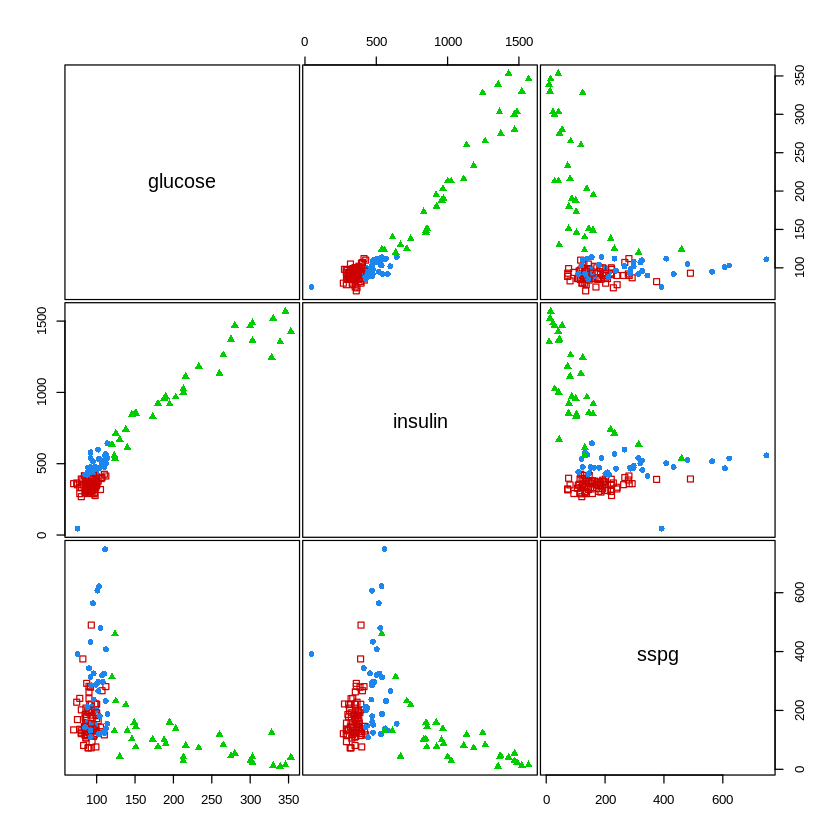

In [ ]:
class <- diabetes$class
table(class)
X <- diabetes[,-1]
head(X)
clPairs(X, class)

EMアルゴリズムでクラスタリングしたときに、どのモデルでクラスタリングをするのが良いかを判断する。
BICはベイズ情報量基準。値が大きいほど良いモデルと解釈する。
グラフの横軸は混合ガウス分布に用いるガウス分布の数

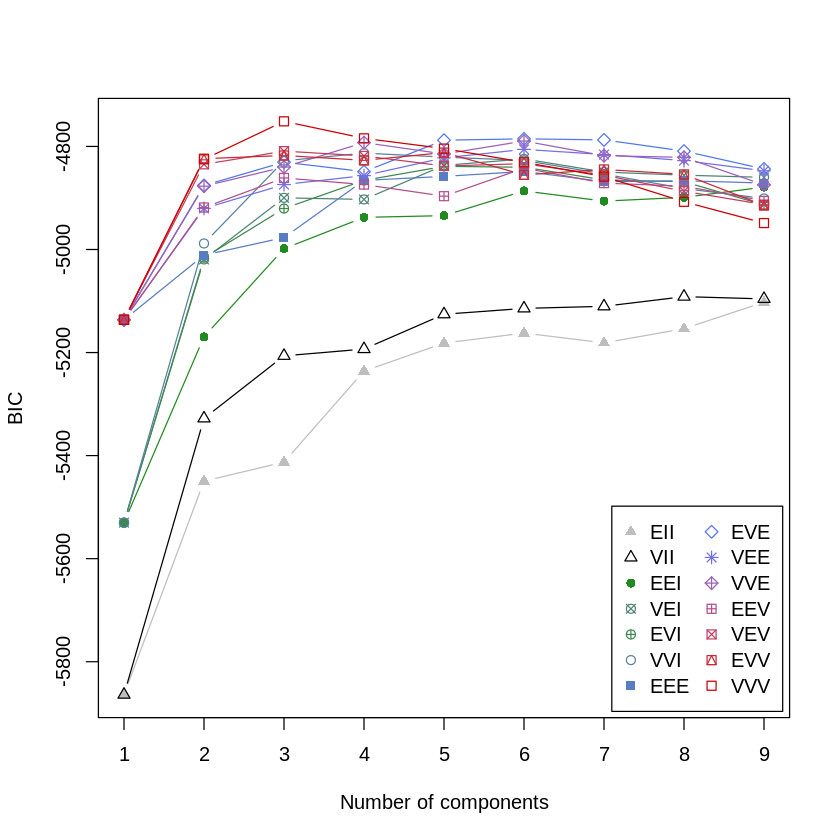

In [ ]:
BIC <- mclustBIC(X)
plot(BIC)

BICによる良いモデルを３つ表示

In [ ]:
summary(BIC)

Best BIC values:
             VVV,3       VVV,4       EVE,6
BIC      -4751.316 -4784.32213 -4785.24591
BIC diff     0.000   -33.00573   -33.92951

EMアルゴリズムによるクラスタリング（本番）


In [ ]:
mod1 <- Mclust(X, x = BIC)
summary(mod1, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 3
components: 

 log-likelihood   n df       BIC       ICL
      -2303.496 145 29 -4751.316 -4770.169

Clustering table:
 1  2  3 
81 36 28 

Mixing probabilities:
        1         2         3 
0.5368974 0.2650129 0.1980897 

Means:
             [,1]     [,2]       [,3]
glucose  90.96239 104.5335  229.42136
insulin 357.79083 494.8259 1098.25990
sspg    163.74858 309.5583   81.60001

Variances:
[,,1]
         glucose    insulin       sspg
glucose 57.18044   75.83206   14.73199
insulin 75.83206 2101.76553  322.82294
sspg    14.73199  322.82294 2416.99074
[,,2]
          glucose   insulin       sspg
glucose  185.0290  1282.340  -509.7313
insulin 1282.3398 14039.283 -2559.0251
sspg    -509.7313 -2559.025 23835.7278
[,,3]
          glucose   insulin      

分類結果をグラフに表示

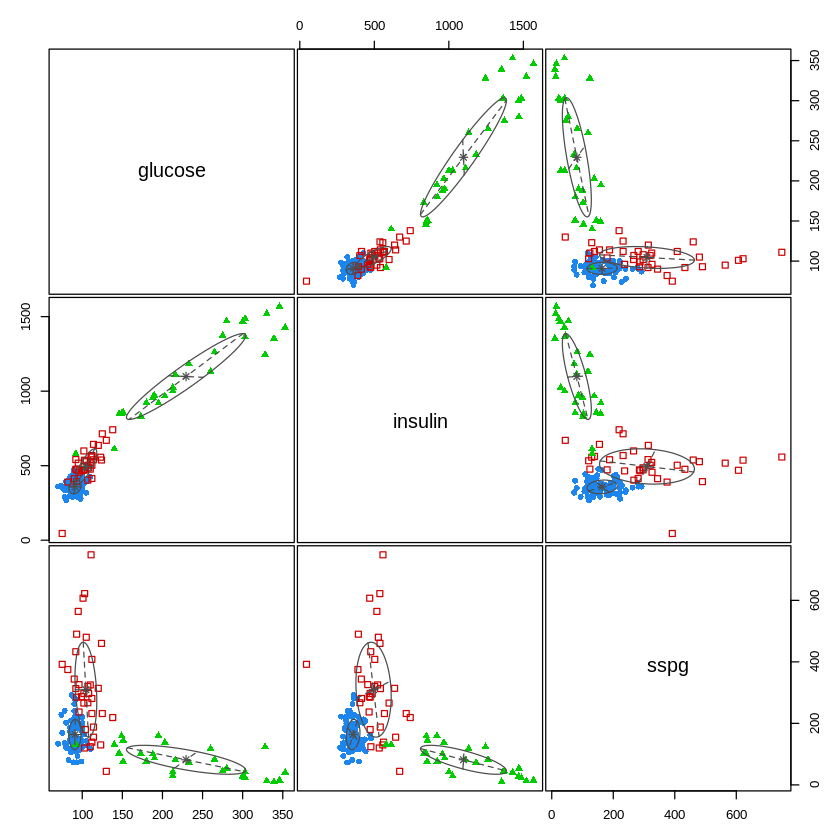

In [ ]:
plot(mod1, what = "classification")

病態(class Chemical, Normal, Overt)と数理的な分類(classification 1, 2, 3)との比較テーブル

In [ ]:
table(class, mod1$classification)

          
class       1  2  3
  Chemical  9 26  1
  Normal   72  4  0
  Overt     0  6 27

Chemicalが数理的分類の2番、Normalは1番、Overtは3番に対応していると解釈できる。細かく見れば、臨床医学としての病態分類には、数理的に分類したクラスが複数混じっていることがわかる。

次に、2番目に良いモデルであるＶＶＶ,４で分類した場合（4つのガウス分布で分類）

In [ ]:
mod2<-Mclust(X, G=4, modelNames="VVV")
summary(mod2, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 4
components: 

 log-likelihood   n df       BIC       ICL
      -2295.115 145 39 -4784.322 -4804.834

Clustering table:
 1  2  3  4 
78 31  8 28 

Mixing probabilities:
         1          2          3          4 
0.52486631 0.22321140 0.05668999 0.19523230 

Means:
             [,1]     [,2]     [,3]       [,4]
glucose  90.96998 104.8515 101.3746  230.94623
insulin 355.49112 505.6991 448.2668 1105.91763
sspg    161.65587 247.3254 534.5374   80.72818

Variances:
[,,1]
         glucose    insulin       sspg
glucose 58.00798   68.35704   17.56978
insulin 68.35704 1944.32777  228.44741
sspg    17.56978  228.44741 2297.65616
[,,2]
          glucose   insulin       sspg
glucose  190.8426  1123.903  -525.9869
insulin 1123.9035  9797.289 -2598.2331
sspg    

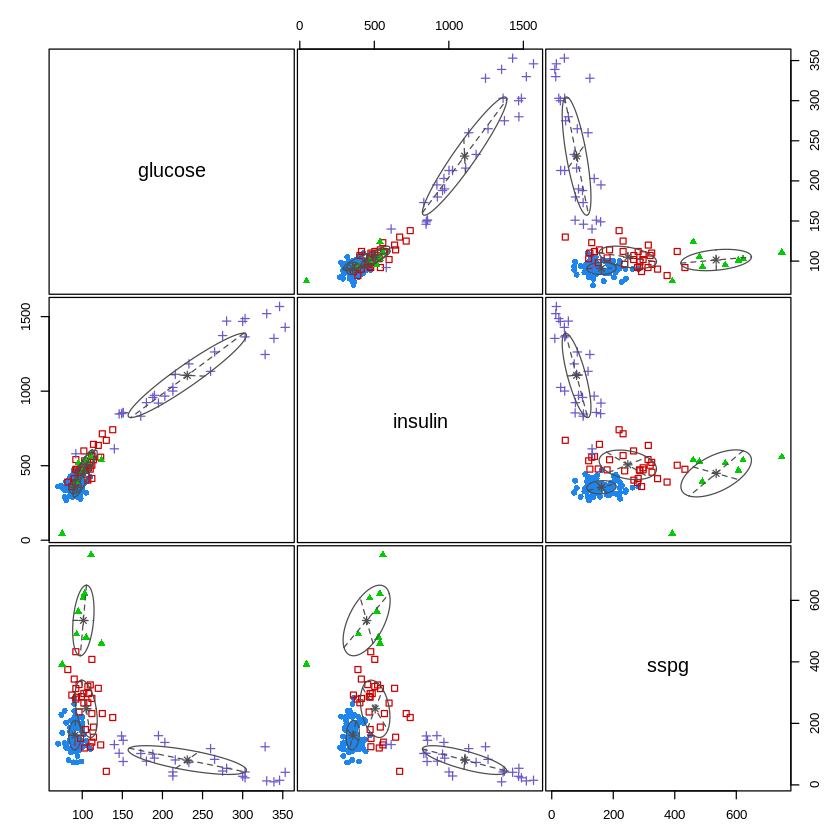

In [ ]:
plot(mod2, what="classification")

In [ ]:
table(class,mod2$classification)

          
class       1  2  3  4
  Chemical  8 21  6  1
  Normal   70  5  1  0
  Overt     0  5  1 27